In [1]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset
dataset=pd.read_excel('Data_Gokul.xlsx', sheet_name='Data Sheet')

# Creating the independent variable Set
X=pd.DataFrame(dataset.iloc[50:260,1:4])

# Creating the Dependet variable set
y = pd.DataFrame(dataset.iloc[50:260,4])

In [2]:
# Some general charactersitics of the original DataSet
dataset.head()


,Time(In weeks),A/F(I/B),CONT(I/B),TRAILER(I/B),A/F(O/B),CONT(O/B),TRAILER(O/B)
0,1,0,0,0,0,0,0
1,2,3,289,492,265,279,243
2,3,22,3,704,0,161,193
3,4,8,136,750,0,339,261
4,5,6,0,720,2,232,188


In [3]:
dataset.shape


(275, 7)

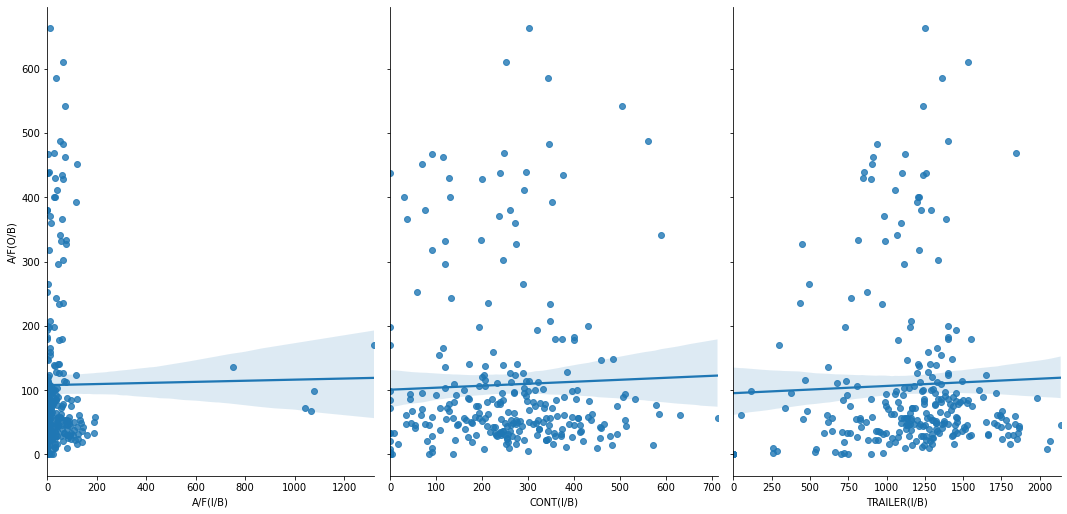

In [4]:
sns.pairplot(dataset, x_vars=['A/F(I/B)','CONT(I/B)','TRAILER(I/B)'], y_vars='A/F(O/B)', height=7, aspect=0.7, kind='reg')

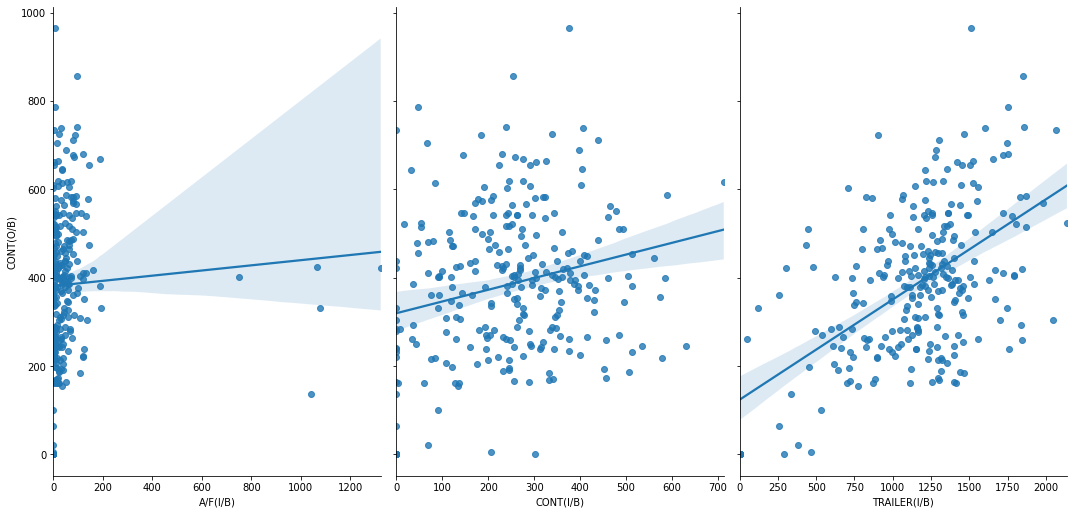

In [5]:

sns.pairplot(dataset, x_vars=['A/F(I/B)','CONT(I/B)','TRAILER(I/B)'], y_vars='CONT(O/B)', height=7, aspect=0.7, kind='reg')

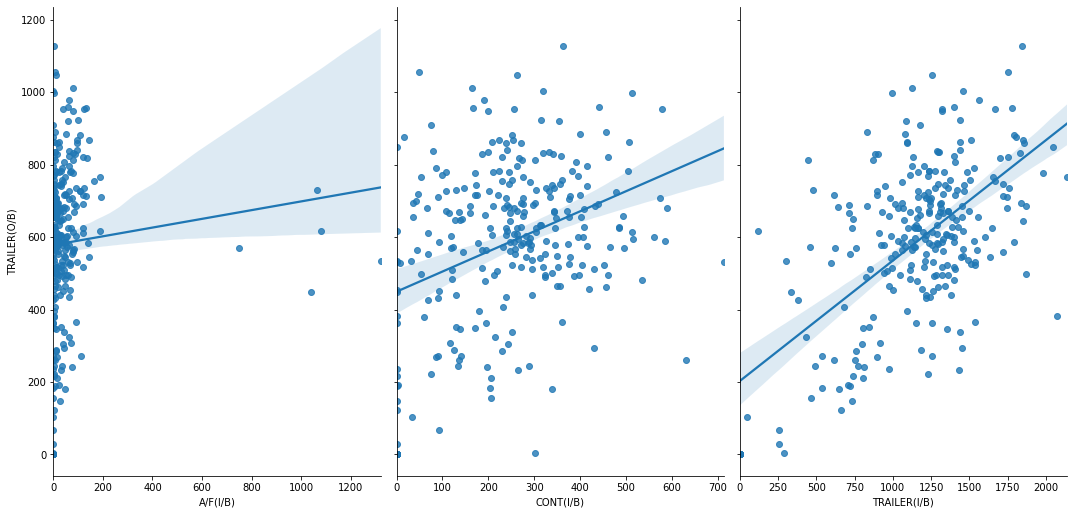

In [6]:
sns.pairplot(dataset, x_vars=['A/F(I/B)','CONT(I/B)','TRAILER(I/B)'], y_vars='TRAILER(O/B)', height=7, aspect=0.7, kind='reg')

In [7]:
dataset.describe()


,Time(In weeks),A/F(I/B),CONT(I/B),TRAILER(I/B),A/F(O/B),CONT(O/B),TRAILER(O/B)
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,138.000000,53.796364,243.734545,1148.632727,108.258182,384.458182,584.501818
std,79.529869,143.859403,147.158036,423.295698,127.765391,171.375503,228.663626
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.500000,4.000000,131.500000,946.000000,35.000000,264.500000,494.000000
50%,138.000000,20.000000,251.000000,1217.000000,60.000000,394.000000,612.000000
75%,206.500000,59.000000,341.500000,1399.000000,110.500000,496.000000,727.000000
max,275.000000,1322.000000,713.000000,2137.000000,663.000000,965.000000,1128.000000


In [8]:
#changing 0 values to rolling mean
X['A/F(I/B)'].rolling(min_periods=2, center=True, window=3).mean()
X['CONT(I/B)'].rolling(min_periods=2, center=True, window=3).mean()
X['TRAILER(I/B)'].rolling(min_periods=2, center=True, window=3).mean()
y['A/F(O/B)'].rolling(min_periods=2, center=True, window=3).mean()

50      84.500000
51      77.000000
52      98.666667
53      91.333333
54     102.666667
55      96.333333
56     146.000000
57     138.000000
58     132.000000
59     107.666667
60     121.333333
61      89.333333
62      71.666667
63      61.000000
64      64.333333
65      64.333333
66      55.333333
67      65.333333
68      71.666667
69      77.666667
70      65.666667
71     100.000000
72      81.666667
73     112.333333
74      94.000000
75     154.333333
76     128.666667
77     103.333333
78      42.666667
79      40.333333
          ...    
230     47.000000
231     49.666667
232     36.666667
233     43.333333
234     35.666667
235     46.000000
236     46.333333
237     49.000000
238     44.666667
239     48.000000
240     39.666667
241     55.000000
242     46.666667
243     59.666667
244     39.000000
245     38.000000
246     35.000000
247     41.000000
248     41.000000
249     38.333333
250     34.333333
251     34.666667
252     50.000000
253     51.000000
254     48

In [9]:

# A look at the Independent variables X
X.head()

,A/F(I/B),CONT(I/B),TRAILER(I/B)
50,0,264,1328
51,47,339,647
52,0,34,50
53,49,400,1078
54,11,229,759


In [10]:
X.tail()

,A/F(I/B),CONT(I/B),TRAILER(I/B)
255,95,254,1851
256,36,85,1527
257,15,35,1836
258,0,17,1803
259,15,67,1743


In [11]:
#A look at the dependent variable
y.head()

,A/F(O/B)
50,113
51,56
52,62
53,178
54,34


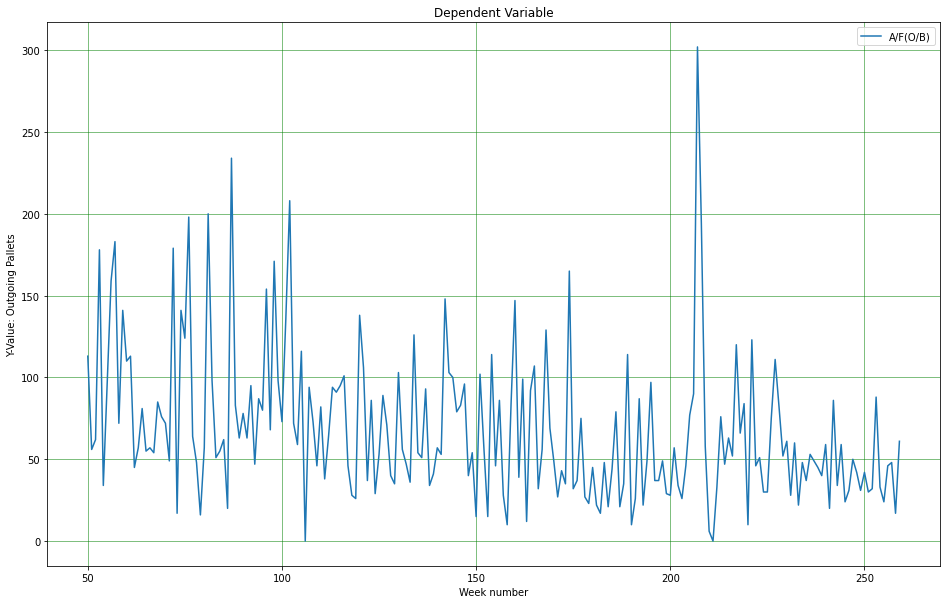

In [12]:
# We graph the dependent variable to se its evolution over time
y.plot(figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Dependent Variable')
plt.xlabel('Week number')
plt.ylabel('Y-Value: Outgoing Pallets')
plt.show()


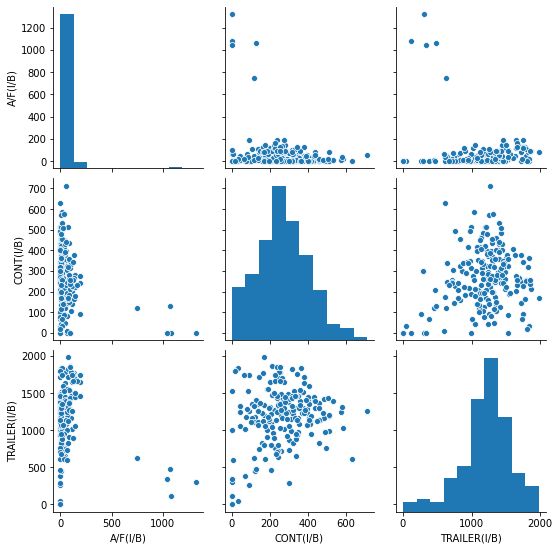

In [13]:

#We take a look at the relationship between the variables in X
sns.pairplot(X)
plt.show()

In [14]:

# New form of splitting, by week number
TEST_SIZE = 55 # Number of days used for the testing

X_test = X.tail(TEST_SIZE)
print(X_test.shape)
print(X_test.tail(TEST_SIZE).head())
print(X_test.tail(TEST_SIZE).tail())

(55, 3)
     A/F(I/B)  CONT(I/B)  TRAILER(I/B)
205        39        578          1318
206        23        507          1436
207        65        245          1336
208         0        319          1456
209        43        431          1451
     A/F(I/B)  CONT(I/B)  TRAILER(I/B)
255        95        254          1851
256        36         85          1527
257        15         35          1836
258         0         17          1803
259        15         67          1743


In [15]:
# Training size is the difference
X_train = X.head(X.shape[0]-TEST_SIZE)
print(X_train.shape)
print(X_train.head())
print(X_train.tail())

(155, 3)
    A/F(I/B)  CONT(I/B)  TRAILER(I/B)
50         0        264          1328
51        47        339           647
52         0         34            50
53        49        400          1078
54        11        229           759
     A/F(I/B)  CONT(I/B)  TRAILER(I/B)
200        55        232          1145
201         0        408          1137
202         5        357          1342
203        84        277          1305
204         0        401          1448


In [16]:

# we do the same with the Y values
y_test = y.tail(TEST_SIZE)
y_train = y.head(X.shape[0]-TEST_SIZE)
print(y_test.shape)
print(y_train.shape)

(55, 1)
(155, 1)


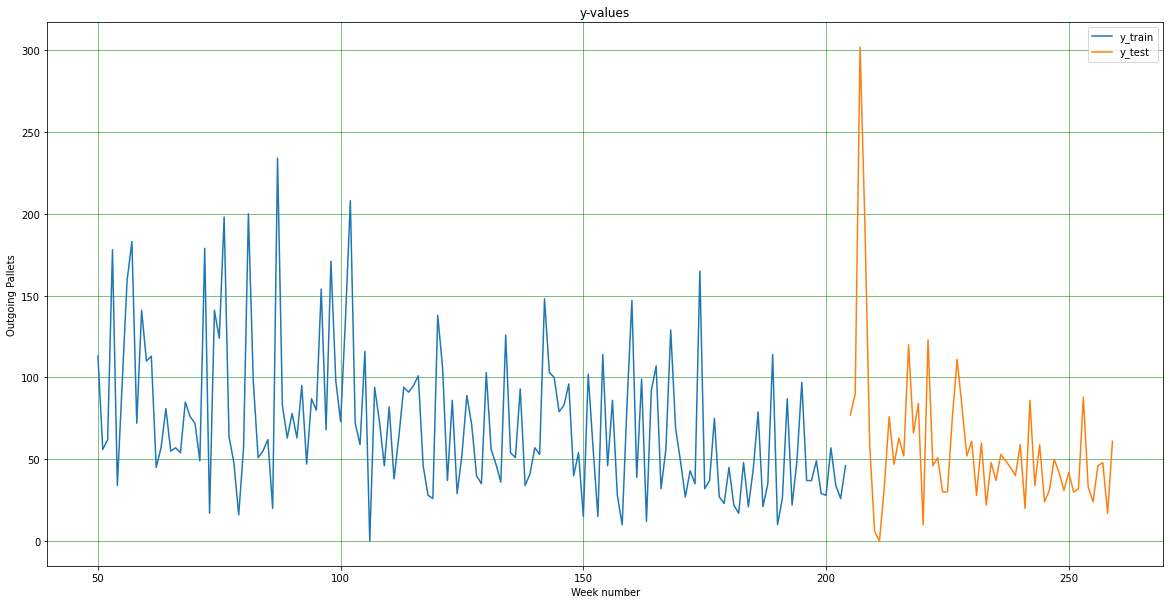

In [35]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(y_train, label = 'y_train')
plt.plot(y_test, label = 'y_test')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('y-values')
plt.xlabel('Week number')
plt.ylabel('Outgoing Pallets')
plt.legend()
plt.show()

In [18]:
#fitting_multiple Regression model 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
#fitting_SVM Model
# Create and train the model usinf Support Vector Algorithm (Regressor)
# this is a supervised learning problem
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear', C=1e3, gamma=0.1)
svr_linear.fit(X_train, y_train)

/home/kathuman/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [20]:
y_test.head(3)

,A/F(O/B)
205,77
206,90
207,302


In [21]:
y_test.tail(3)

,A/F(O/B)
257,48
258,17
259,61


In [22]:
X_test.head(3)

,A/F(I/B),CONT(I/B),TRAILER(I/B)
205,39,578,1318
206,23,507,1436
207,65,245,1336


In [23]:
X_test.tail(3)

,A/F(I/B),CONT(I/B),TRAILER(I/B)
257,15,35,1836
258,0,17,1803
259,15,67,1743


In [24]:
# Print the prediction for Linear Regression for the next 'n' days
lr_prediction = regressor.predict(X_test)

# Print the predictionfor the SVM prediction for the next 'n' days
svm_prediction = svr_linear.predict(X_test)

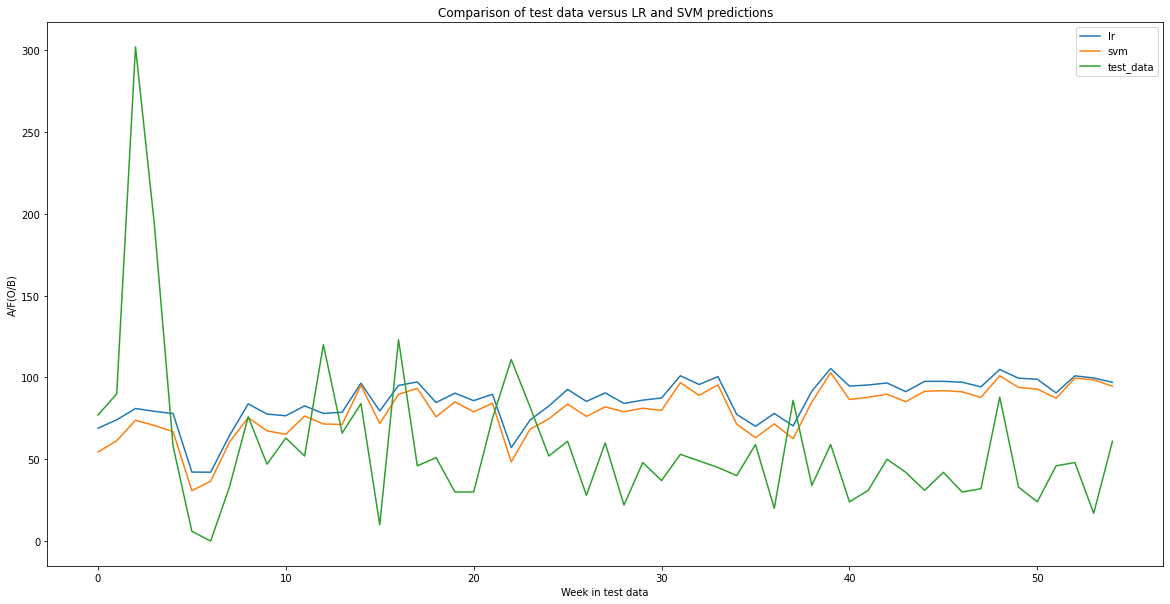

In [34]:
plt.plot(lr_prediction, label="lr")
plt.plot(svm_prediction, label="svm")
plt.plot(y_test.values, label="test_data")
plt.title("Comparison of test data versus LR and SVM predictions")
plt.ylabel("A/F(O/B)")
plt.xlabel("Week in test data")
plt.legend()
plt.show()

In [36]:
print("LR Coefficient: ", regressor.coef_)
print("SVM Coefficient: ", svr_linear.coef_)
print("LR Intercept: ", regressor.intercept_)
print("SVM Intercept: ", svr_linear.intercept_)

LR Coefficient:  [[ 0.05137805 -0.03047232  0.03222939]]
SVM Coefficient:  [[ 0.05304981 -0.0523313   0.03488051]]
LR Intercept:  [42.0944868]
SVM Intercept:  [36.5784739]


## Accuracy measures

In [43]:
from sklearn.metrics import mean_squared_error
import math

print("Accuracy through the Root Mean Squared Error RMSE")
print("RMSE for LR: {:.2f}".format(math.sqrt(mean_squared_error(y_test, lr_prediction))))
print("RMSE for SVM: {:.2f}".format(math.sqrt(mean_squared_error(y_test, svm_prediction))))      

Accuracy through the Root Mean Squared Error RMSE
RMSE for LR: 56.47
RMSE for SVM: 54.20
